In [68]:
from sklearn.preprocessing import LabelEncoder
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('fixed_floats.csv')

In [70]:
columns = ['totalarea', 'cntroom', 'district', 'long', 'ceiling', 'kitchenarea', 'width', 'maxfloor', 'livingarea']
target = ['price2',]
TARGET_NAME = 'price2'

In [71]:
df = df[target+columns]

In [72]:
df

,price2,totalarea,cntroom,district,long,ceiling,kitchenarea,width,maxfloor,livingarea
0,1064516,93.00,3,ЦАО,37.543138,NaN,NaN,55.754031,24,74.0
1,532602,90.50,3,ЗАО,37.428486,3.20,7.7,55.542115,10,43.8
2,211441,236.00,4,ЗАО,37.443533,3.00,20.0,55.728003,25,180.0
3,561798,89.00,4,ЗАО,37.443533,3.00,16.0,55.728003,39,48.0
4,458716,109.00,4,ЗАО,37.443533,3.10,18.0,55.728003,39,62.0
...,...,...,...,...,...,...,...,...,...,...
4181,470803,84.20,3,СВАО,37.624687,3.24,NaN,55.796977,44,NaN
4182,446000,89.40,3,СЗАО,37.467904,3.24,NaN,55.773236,6,NaN
4183,378268,111.78,3,ЦАО,37.526609,3.10,16.0,55.752116,41,45.4
4184,670933,65.30,3,СЗАО,37.516036,3.02,25.8,55.760646,32,27.4


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price2       4186 non-null   int64  
 1   totalarea    4186 non-null   float64
 2   cntroom      4186 non-null   int64  
 3   district     4186 non-null   object 
 4   long         4186 non-null   float64
 5   ceiling      3077 non-null   float64
 6   kitchenarea  3204 non-null   float64
 7   width        4186 non-null   float64
 8   maxfloor     4186 non-null   int64  
 9   livingarea   2985 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 327.2+ KB


In [74]:
df.ceiling.fillna(df.ceiling.mean(), inplace=True)

In [75]:
df.ceiling.mean()

3.03452713682158

In [76]:
df['kitchenarea'] = df.groupby('cntroom')['kitchenarea'].transform(lambda x: x.fillna(x.mean()))


In [77]:
df.groupby('cntroom')['kitchenarea'].agg('mean')

cntroom
0     5.741776
1    11.714002
2    12.645207
3    18.119613
4    19.729673
5    22.580870
Name: kitchenarea, dtype: float64

In [78]:
df['livingarea'] = df.groupby('cntroom')['livingarea'].transform(lambda x: x.fillna(x.mean()))


In [79]:
df.groupby('cntroom')['livingarea'].agg('mean')

cntroom
0     13.866038
1     17.308859
2     30.701434
3     61.037017
4     79.482310
5    114.412150
Name: livingarea, dtype: float64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price2       4186 non-null   int64  
 1   totalarea    4186 non-null   float64
 2   cntroom      4186 non-null   int64  
 3   district     4186 non-null   object 
 4   long         4186 non-null   float64
 5   ceiling      4186 non-null   float64
 6   kitchenarea  4186 non-null   float64
 7   width        4186 non-null   float64
 8   maxfloor     4186 non-null   int64  
 9   livingarea   4186 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 327.2+ KB


In [81]:
df = pd.get_dummies(df, columns=['district', 'cntroom'])

In [82]:
df

,price2,totalarea,long,ceiling,kitchenarea,width,maxfloor,livingarea,district_ВАО,district_ЗАО,...,district_ЦАО,district_ЮАО,district_ЮВАО,district_ЮЗАО,cntroom_0,cntroom_1,cntroom_2,cntroom_3,cntroom_4,cntroom_5
0,1064516,93.00,37.543138,3.034527,18.119613,55.754031,24,74.000000,0,0,...,1,0,0,0,0,0,0,1,0,0
1,532602,90.50,37.428486,3.200000,7.700000,55.542115,10,43.800000,0,1,...,0,0,0,0,0,0,0,1,0,0
2,211441,236.00,37.443533,3.000000,20.000000,55.728003,25,180.000000,0,1,...,0,0,0,0,0,0,0,0,1,0
3,561798,89.00,37.443533,3.000000,16.000000,55.728003,39,48.000000,0,1,...,0,0,0,0,0,0,0,0,1,0
4,458716,109.00,37.443533,3.100000,18.000000,55.728003,39,62.000000,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,470803,84.20,37.624687,3.240000,18.119613,55.796977,44,61.037017,0,0,...,0,0,0,0,0,0,0,1,0,0
4182,446000,89.40,37.467904,3.240000,18.119613,55.773236,6,61.037017,0,0,...,0,0,0,0,0,0,0,1,0,0
4183,378268,111.78,37.526609,3.100000,16.000000,55.752116,41,45.400000,0,0,...,1,0,0,0,0,0,0,1,0,0
4184,670933,65.30,37.516036,3.020000,25.800000,55.760646,32,27.400000,0,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
df.dropna(inplace=True)

In [84]:
data = train_test_split(df.drop([TARGET_NAME], axis=1), df[TARGET_NAME], train_size=0.8, random_state=42)
X_train, X_test, y_train, y_test = data

In [85]:
model = LinearRegression()

In [86]:
model.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred = model.predict(X_test)

Root Mean Squared Error (RMSE): 250854.9917
R^2 Score: 0.36103612434907006


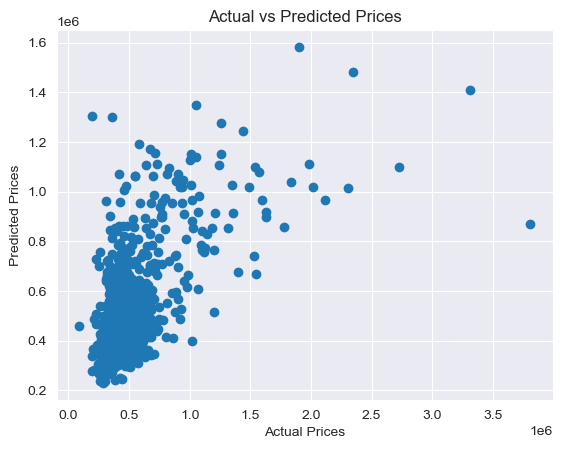

In [88]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {math.sqrt(mse):.4f}")
print(f'R^2 Score: {r2}')

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [89]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [90]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [91]:
y_pred = model.predict(X_test)

Root Mean Squared Error (RMSE): 195520.2400
R^2 Score: 0.6118368940634479


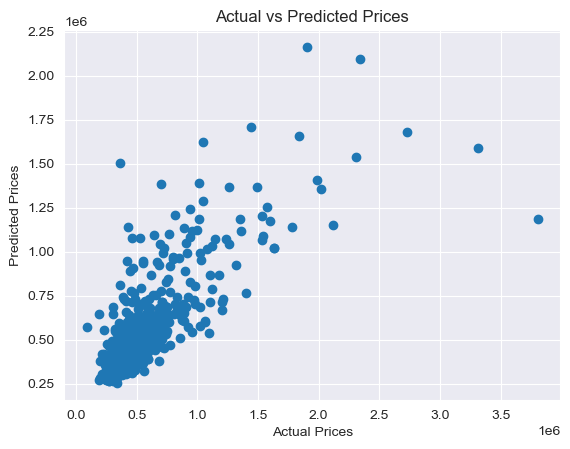

In [92]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {math.sqrt(mse):.4f}")
print(f'R^2 Score: {r2}')

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [93]:
import pickle 

In [94]:
filename = 'GradientBoostingRegressor.pkl'
pickle.dump(model, open(filename, 'wb')) 